In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
k1 = 10**6
k2 = 10**-4
k3 = 10**-1

In [43]:
S10 = 5 * 10**-7
S20 = 2 * 10**-7
S30 = 0
S40 = 0

In [44]:
T = 30
dt = 0.1
t = np.linspace(0, T, int(T/dt) + 1)

In [45]:
def dS1dt(S1, S2, S3, S4):
    return -k1*S1*S2 + k2*S3

def dS2dt(S1, S2, S3, S4):
    return -k1*S1*S2 + k2*S3 + k3*S3

def dS3dt(S1, S2, S3, S4):
    return k1*S1*S2 - k2*S3 - k3*S3

def dS4dt(S1, S2, S3, S4):
    return k3*S3

In [46]:
# Estimate by Runge-Kutta Method
S1_rk = np.zeros(len(t))
S1_rk[0] = S10

S2_rk = np.zeros(len(t))
S2_rk[0] = S20

S3_rk = np.zeros(len(t))
S3_rk[0] = S30

S4_rk = np.zeros(len(t))
S4_rk[0] = S40

for it in range(1, len(t)):    
    wk1 = dS1dt(S1_rk[it-1], S2_rk[it-1], S3_rk[it-1], S4_rk[it-1])
    xk1 = dS2dt(S1_rk[it-1], S2_rk[it-1], S3_rk[it-1], S4_rk[it-1])
    yk1 = dS3dt(S1_rk[it-1], S2_rk[it-1], S3_rk[it-1], S4_rk[it-1])
    zk1 = dS4dt(S1_rk[it-1], S2_rk[it-1], S3_rk[it-1], S4_rk[it-1])
    wk2 = dS1dt(S1_rk[it-1] + wk1 * dt/2, S2_rk[it-1] + xk1 * dt/2, S3_rk[it-1] + yk1 * dt/2, S4_rk[it-1] + zk1 * dt/2)
    xk2 = dS2dt(S1_rk[it-1] + wk1 * dt/2, S2_rk[it-1] + xk1 * dt/2, S3_rk[it-1] + yk1 * dt/2, S4_rk[it-1] + zk1 * dt/2)
    yk2 = dS3dt(S1_rk[it-1] + wk1 * dt/2, S2_rk[it-1] + xk1 * dt/2, S3_rk[it-1] + yk1 * dt/2, S4_rk[it-1] + zk1 * dt/2)
    zk2 = dS4dt(S1_rk[it-1] + wk1 * dt/2, S2_rk[it-1] + xk1 * dt/2, S3_rk[it-1] + yk1 * dt/2, S4_rk[it-1] + zk1 * dt/2)
    wk3 = dS1dt(S1_rk[it-1] + wk2 * dt/2, S2_rk[it-1] + xk2 * dt/2, S3_rk[it-1] + yk2 * dt/2, S4_rk[it-1] + zk2 * dt/2)
    xk3 = dS2dt(S1_rk[it-1] + wk2 * dt/2, S2_rk[it-1] + xk2 * dt/2, S3_rk[it-1] + yk2 * dt/2, S4_rk[it-1] + zk2 * dt/2)
    yk3 = dS3dt(S1_rk[it-1] + wk2 * dt/2, S2_rk[it-1] + xk2 * dt/2, S3_rk[it-1] + yk2 * dt/2, S4_rk[it-1] + zk2 * dt/2)
    zk3 = dS4dt(S1_rk[it-1] + wk2 * dt/2, S2_rk[it-1] + xk2 * dt/2, S3_rk[it-1] + yk2 * dt/2, S4_rk[it-1] + zk2 * dt/2)
    wk4 = dS1dt(S1_rk[it-1] + wk3 * dt, S2_rk[it-1] + xk3 * dt, S3_rk[it-1] + yk3 * dt, S4_rk[it-1] + zk3 * dt)
    xk4 = dS2dt(S1_rk[it-1] + wk3 * dt, S2_rk[it-1] + xk3 * dt, S3_rk[it-1] + yk3 * dt, S4_rk[it-1] + zk3 * dt)
    yk4 = dS3dt(S1_rk[it-1] + wk3 * dt, S2_rk[it-1] + xk3 * dt, S3_rk[it-1] + yk3 * dt, S4_rk[it-1] + zk3 * dt)
    zk4 = dS4dt(S1_rk[it-1] + wk3 * dt, S2_rk[it-1] + xk3 * dt, S3_rk[it-1] + yk3 * dt, S4_rk[it-1] + zk3 * dt)

    S1_rk[it] = S1_rk[it-1] + (1/6) * dt * (wk1 + 2*wk2 + 2*wk3 + wk4)
    S2_rk[it] = S2_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    S3_rk[it] = S3_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    S4_rk[it] = S4_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)

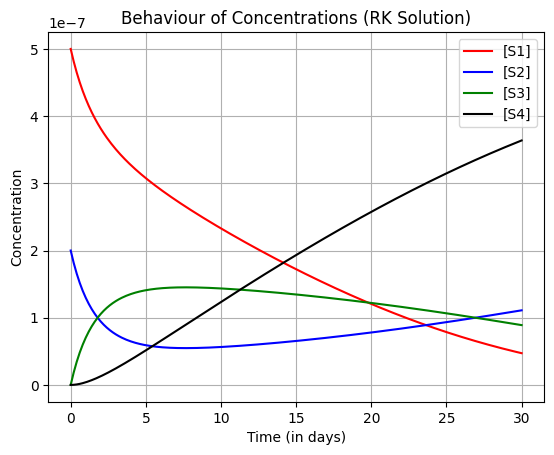

In [47]:
plt.plot(t, S1_rk, label='[S1]', color='red')
plt.plot(t, S2_rk, label='[S2]', color='blue')
plt.plot(t, S3_rk, label='[S3]', color='green')
plt.plot(t, S4_rk, label='[S4]', color='black')
plt.xlabel('Time (in days)')
plt.ylabel('Concentration')
plt.title('Behaviour of Concentrations (RK Solution)')
plt.legend()
plt.grid()

plt.show()